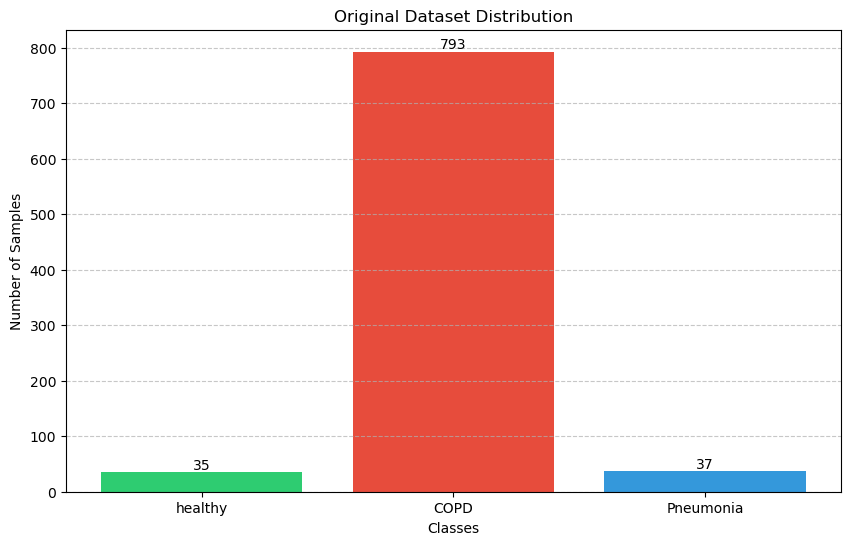


Original Dataset Distribution:
--------------------------------------------------
Class              Count   Percentage
--------------------------------------------------
COPD                 793       91.68%
Pneumonia             37        4.28%
healthy               35        4.05%
--------------------------------------------------
Total samples: 865
--------------------------------------------------


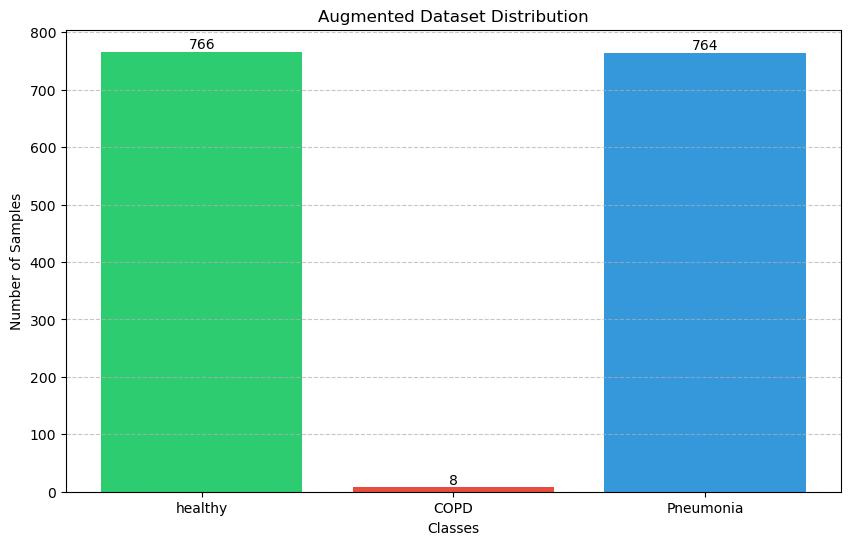


Augmented Dataset Distribution:
--------------------------------------------------
Class              Count   Percentage
--------------------------------------------------
COPD                   8        0.52%
Pneumonia            764       49.67%
healthy              766       49.80%
--------------------------------------------------
Total samples: 1538
--------------------------------------------------


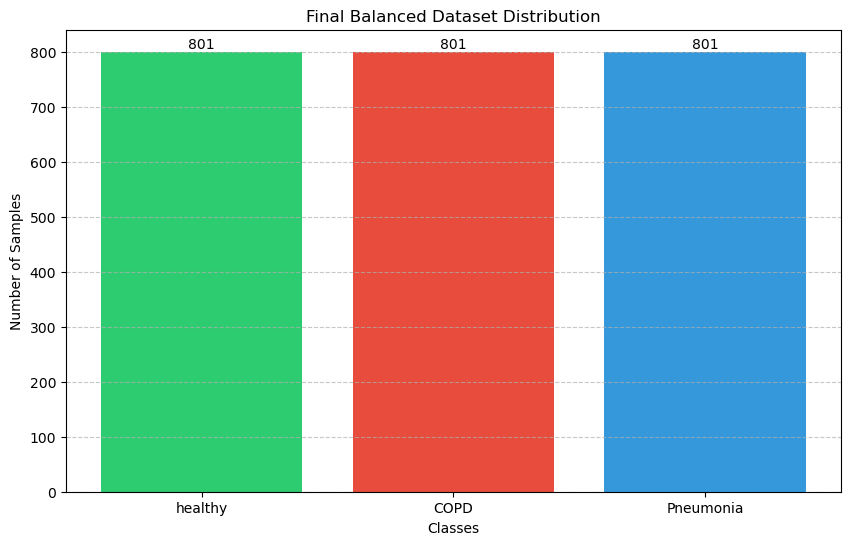


Final Balanced Dataset Distribution:
--------------------------------------------------
Class              Count   Percentage
--------------------------------------------------
COPD                 801       33.33%
Pneumonia            801       33.33%
healthy              801       33.33%
--------------------------------------------------
Total samples: 2403
--------------------------------------------------

Dataset Balancing Summary:
Class             Original    Augmented      Final
--------------------------------------------------
healthy                 35          766        801
COPD                   793            8        801
Pneumonia               37          764        801
Total samples: 2403 (Target: 2403)

Initial Balanced Dataset Statistics:
--------------------------------------------------
Class              Count   Percentage
--------------------------------------------------
COPD                 801       33.33%
Pneumonia            801       33.33%
healthy       

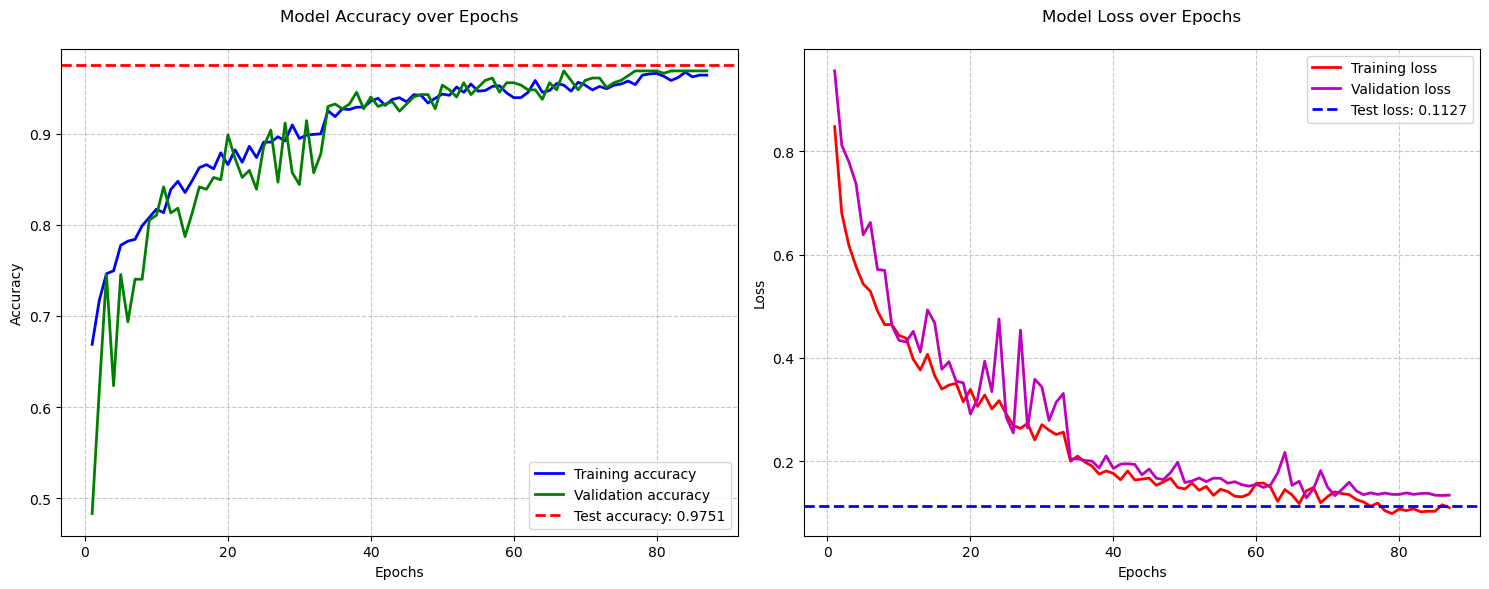

<Figure size 640x480 with 0 Axes>


Model Performance Metrics:
Training Metrics:
Final Training Accuracy: 0.9642
Final Training Loss: 0.1100
Best Training Accuracy: 0.9675
Best Training Loss: 0.0984

Validation Metrics:
Final Validation Accuracy: 0.9688
Final Validation Loss: 0.1341
Best Validation Accuracy: 0.9688
Best Validation Loss: 0.1288

Test Metrics:
Test Accuracy: 0.9751
Test Loss: 0.1127


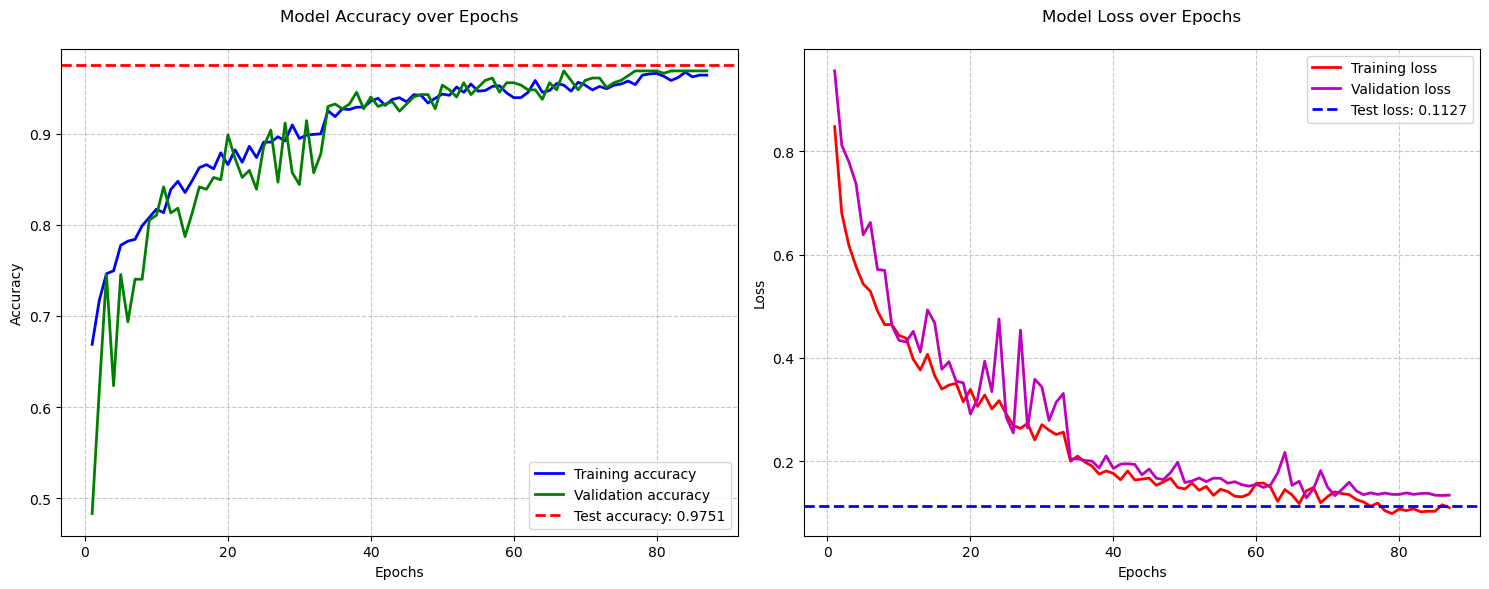

<Figure size 640x480 with 0 Axes>


Training Summary Report
Accuracy Metrics:
--------------------------------------------------------------------------------
Initial Training Accuracy: 0.6688
Final Training Accuracy: 0.9642
Best Training Accuracy: 0.9675
Accuracy Improvement: 44.16%
Test Accuracy: 0.9751

Loss Metrics:
--------------------------------------------------------------------------------
Initial Training Loss: 0.8480
Final Training Loss: 0.1100
Best Training Loss: 0.0984
Loss Improvement: 87.03%
Test Loss: 0.1127

Validation Metrics:
--------------------------------------------------------------------------------
Best Validation Accuracy: 0.9688
Final Validation Accuracy: 0.9688
Best Validation Loss: 0.1288
Final Validation Loss: 0.1341
16/16 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

        COPD       1.00      0.95      0.97       174
   Pneumonia       0.95      0.99      0.97       167
     healthy       0.98      0.99      0.98       140

    a

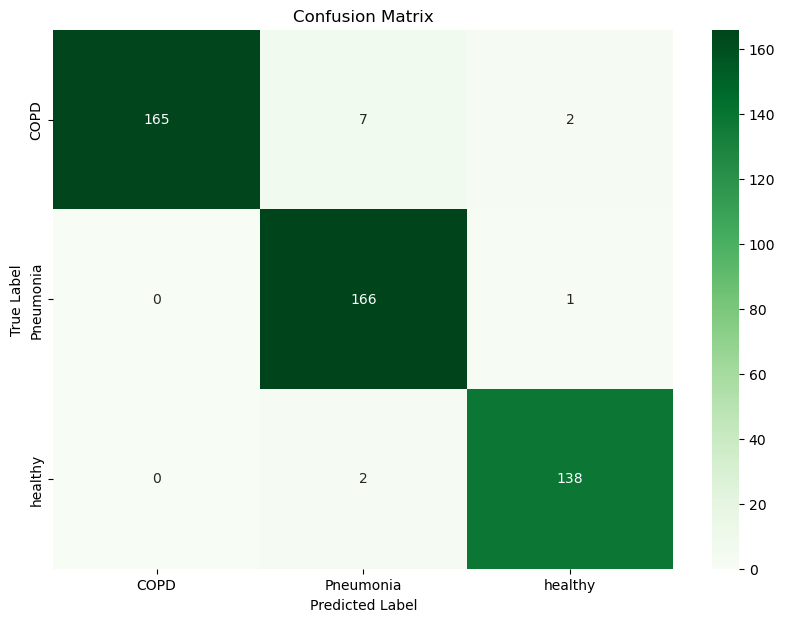

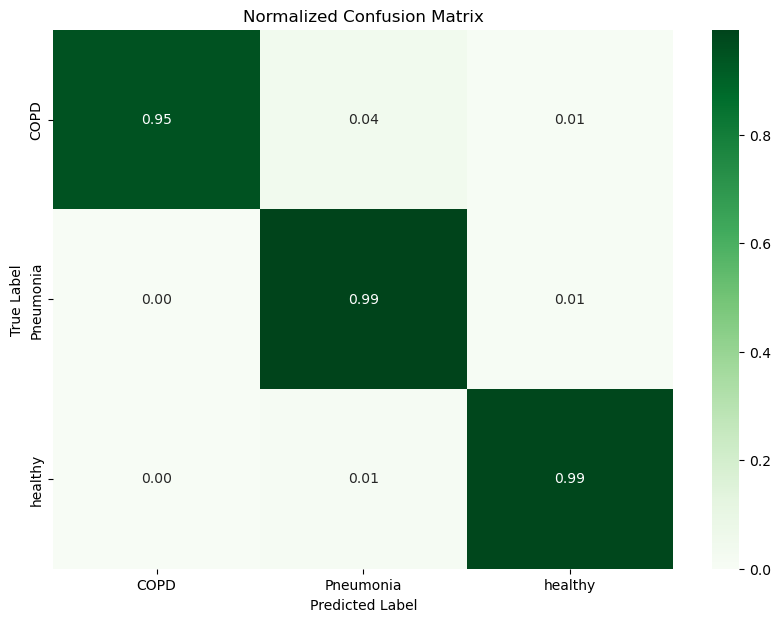

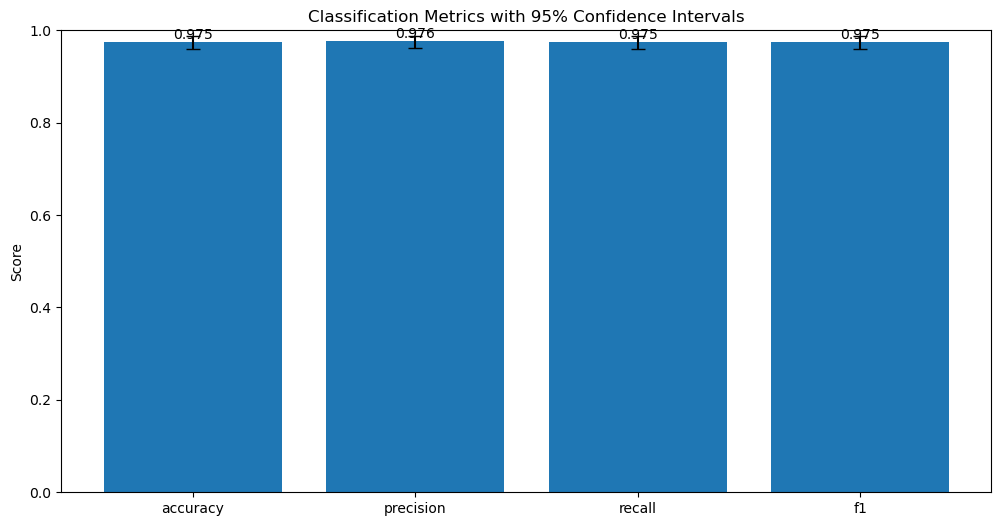


Confidence Intervals (95%):
Accuracy:
  Mean: 0.975
  95% CI: [0.960, 0.988]
Precision:
  Mean: 0.976
  95% CI: [0.963, 0.988]
Recall:
  Mean: 0.975
  95% CI: [0.960, 0.988]
F1:
  Mean: 0.975
  95% CI: [0.961, 0.988]

Statistical Significance Testing:
Observed Accuracy: 0.975
Null Accuracy: 0.333
T-statistic: 90.237
P-value: 0.000e+00
Result is statistically significant (p < 0.05)

Per-Class Metrics with Confidence Intervals:

COPD:
  Precision:
    Mean: 1.000
    95% CI: [1.000, 1.000]
  Recall:
    Mean: 0.947
    95% CI: [0.911, 0.977]
  F1:
    Mean: 0.973
    95% CI: [0.953, 0.988]

Pneumonia:
  Precision:
    Mean: 0.949
    95% CI: [0.915, 0.979]
  Recall:
    Mean: 0.994
    95% CI: [0.981, 1.000]
  F1:
    Mean: 0.971
    95% CI: [0.953, 0.987]

healthy:
  Precision:
    Mean: 0.979
    95% CI: [0.950, 1.000]
  Recall:
    Mean: 0.986
    95% CI: [0.962, 1.000]
  F1:
    Mean: 0.982
    95% CI: [0.964, 0.996]

Confidence Intervals (95%):
Metric       Mean     95% CI         

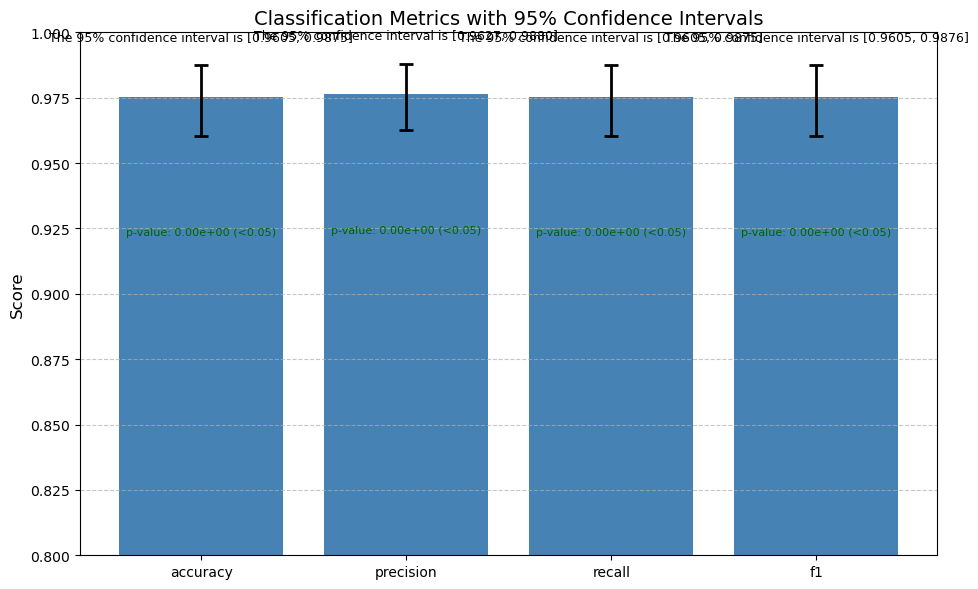


Per-Class Metrics with Confidence Intervals:
Class                     Metric     Mean     95% CI         
----------------------------------------------------------------------
COPD                      precision  1.000     [1.000, 1.000]
                          recall     0.947     [0.911, 0.977]
                          f1         0.973     [0.953, 0.988]
----------------------------------------------------------------------
Pneumonia                 precision  0.949     [0.915, 0.979]
                          recall     0.994     [0.981, 1.000]
                          f1         0.971     [0.953, 0.987]
----------------------------------------------------------------------
healthy                   precision  0.979     [0.950, 1.000]
                          recall     0.986     [0.962, 1.000]
                          f1         0.982     [0.964, 0.996]
----------------------------------------------------------------------


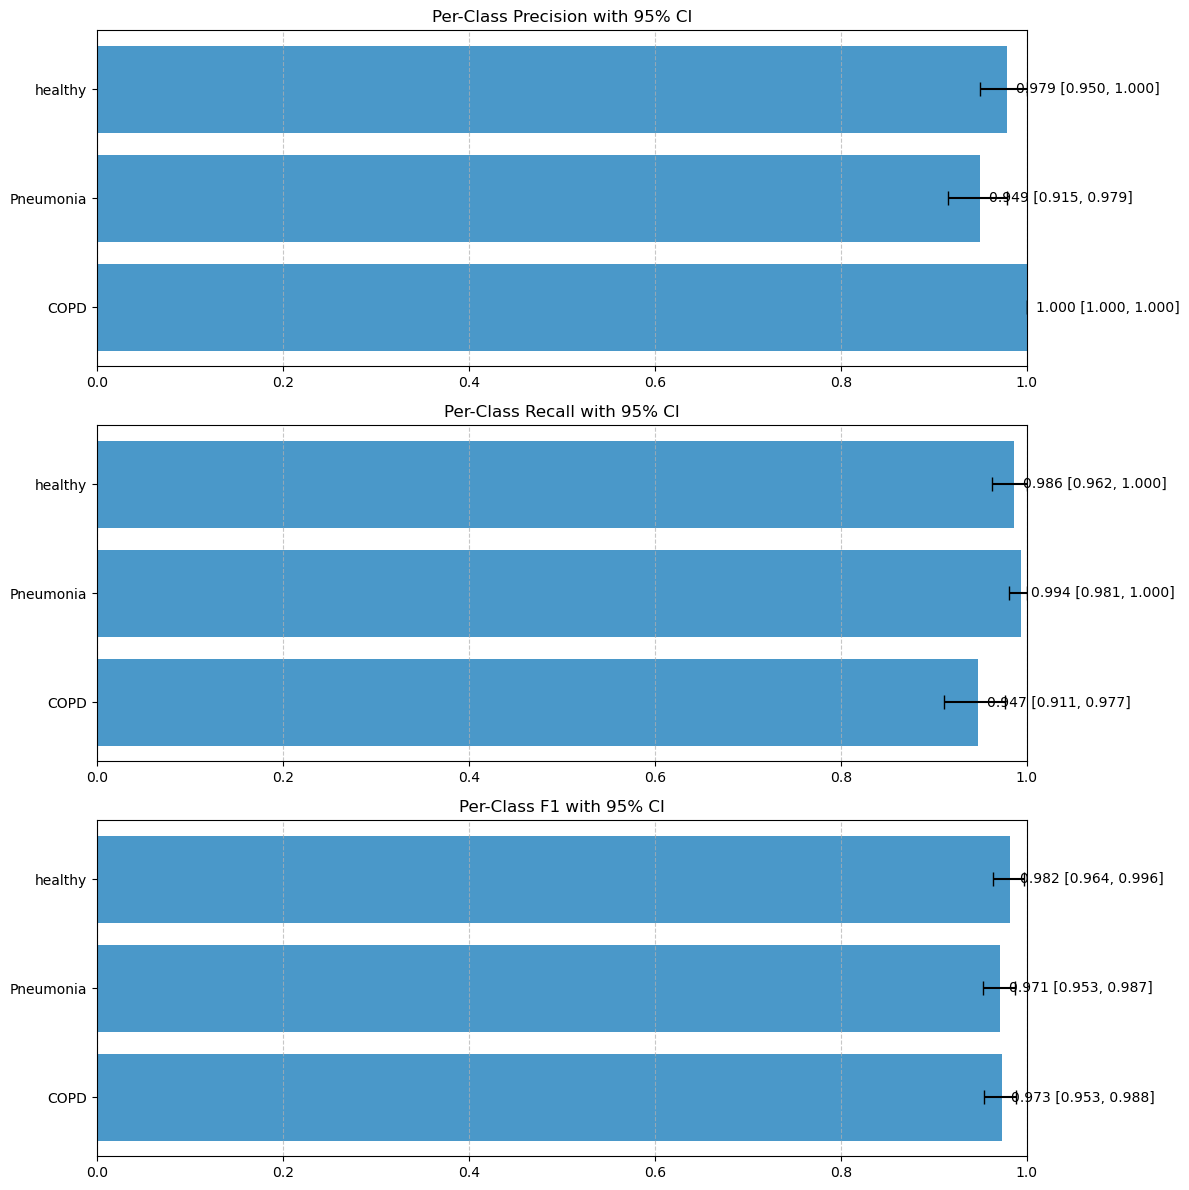

<Figure size 1500x1000 with 0 Axes>

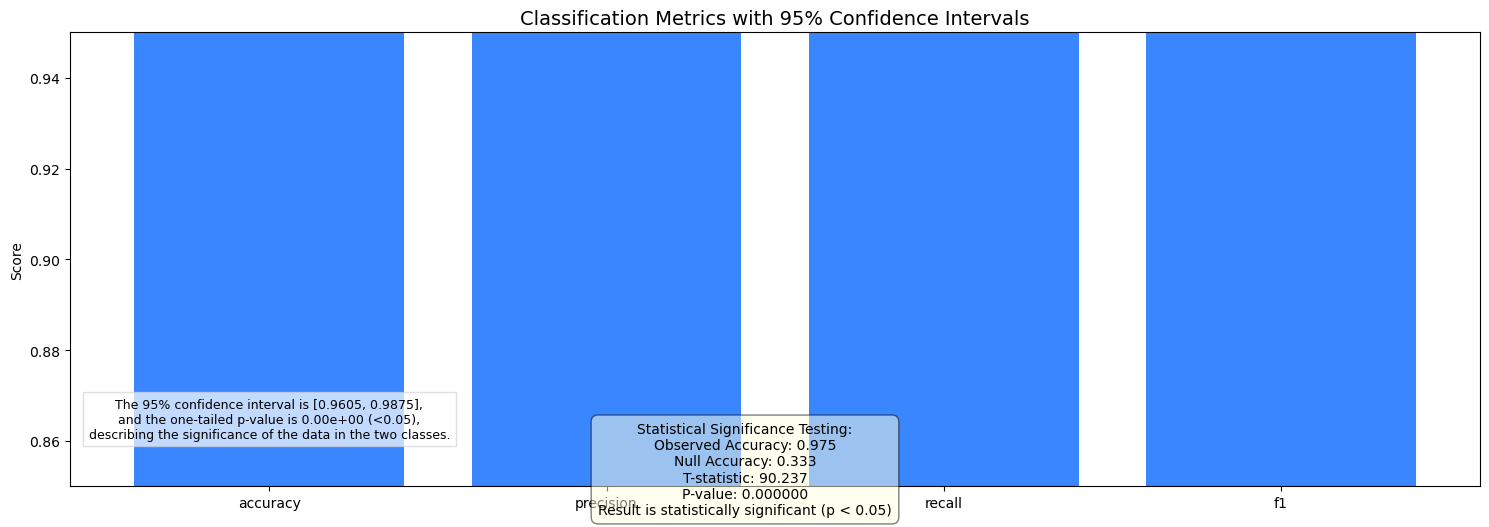

In [1]:
import os
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (
    Dense, 
    LSTM, 
    Bidirectional, 
    Dropout, 
    GRU, 
    Conv1D, 
    MaxPooling1D, 
    BatchNormalization,
    Flatten
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from collections import Counter
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.utils import resample
from scipy import stats

def display_dataset_statistics(features, labels, stage=""):
    """Display detailed statistics about the dataset composition"""
    print(f"\n{stage} Dataset Statistics:")
    print("-" * 50)
    class_counts = Counter(labels)
    
    # Calculate percentages
    total = len(labels)
    print(f"{'Class':<15} {'Count':>8} {'Percentage':>12}")
    print("-" * 50)
    for class_name, count in sorted(class_counts.items()):
        percentage = (count / total) * 100
        print(f"{class_name:<15} {count:>8} {percentage:>11.2f}%")
    print("-" * 50)
    print(f"Total samples: {total}")
    print("-" * 50)

# Data Augmentation Functions
def add_noise(data, noise_factor=0.005):
    """Add random noise to the audio data"""
    noise = np.random.randn(len(data))
    return data + noise_factor * noise

def time_shift(data, shift_max=0.4):
    """Shift the audio data in time"""
    shift = np.random.randint(len(data) * shift_max)
    return np.roll(data, shift)

def change_pitch(data, sr, n_steps=2):
    """Change the pitch of the audio"""
    return librosa.effects.pitch_shift(y=data, sr=sr, n_steps=n_steps)

def stretch(data, rate=1.1):
    """Stretch the audio in time"""
    return librosa.effects.time_stretch(y=data, rate=rate)

def random_erase(data, erase_percentage=0.1):
    """Randomly erase a portion of the audio"""
    data_length = len(data)
    erase_length = int(data_length * erase_percentage)
    erase_start = np.random.randint(0, data_length - erase_length)
    data[erase_start:erase_start + erase_length] = 0
    return data

def speed_tuning(data, rate=2):
    """Change the speed of the audio"""
    return librosa.effects.time_stretch(data, rate=rate)

def apply_augmentations(audio, sr):
    """Apply all augmentation techniques to create multiple variants"""
    augmented_data = []
    
    # Basic augmentations
    augmented_data.extend([
        add_noise(audio.copy()),
        time_shift(audio.copy()),
        change_pitch(audio.copy(), sr),
        stretch(audio.copy()),
        random_erase(audio.copy()),
        speed_tuning(audio.copy()),
        add_noise(time_shift(audio.copy())),
        stretch(change_pitch(audio.copy(), sr))
    ])
    
    return augmented_data

def display_dataset_distribution(labels, title="Dataset Distribution"):
    """Display dataset distribution with a bar plot"""
    class_counts = Counter(labels)
    
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color=['#2ecc71', '#e74c3c', '#3498db'])
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    
    for i, (key, value) in enumerate(class_counts.items()):
        plt.text(i, value, str(value), ha='center', va='bottom')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # Print detailed statistics
    print(f"\n{title}:")
    print("-" * 50)
    total = sum(class_counts.values())
    print(f"{'Class':<15} {'Count':>8} {'Percentage':>12}")
    print("-" * 50)
    for class_name, count in sorted(class_counts.items()):
        percentage = (count / total) * 100
        print(f"{class_name:<15} {count:>8} {percentage:>11.2f}%")
    print("-" * 50)
    print(f"Total samples: {total}")
    print("-" * 50)

def load_balanced_data(normal_path, pathological_paths, target_samples_per_class=801):
    """
    Load and balance the dataset to have exactly 801 samples per class
    """
    original_features = []
    original_labels = []
    augmented_features = []
    augmented_labels = []
    
    # Track original and augmented counts
    dataset_stats = {
        'original': {},
        'augmented': {},
        'final': {}
    }
    
    # Load normal files
    normal_files = [os.path.join(normal_path, f) for f in os.listdir(normal_path) if f.endswith('.wav')]
    dataset_stats['original']['healthy'] = len(normal_files)
    
    # Load pathological files
    pathological_files = {}
    for path, label in pathological_paths:
        files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.wav')]
        pathological_files[label] = files
        dataset_stats['original'][label] = len(files)
    
    # Process and store original data
    all_original_labels = []
    
    # Process normal data
    for file_path in normal_files:
        audio, sr = librosa.load(file_path, sr=22050)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        original_features.append(np.mean(mfccs.T, axis=0))
        original_labels.append('healthy')
        all_original_labels.append('healthy')
    
    # Process pathological data
    for label, files in pathological_files.items():
        for file_path in files:
            audio, sr = librosa.load(file_path, sr=22050)
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            original_features.append(np.mean(mfccs.T, axis=0))
            original_labels.append(label)
            all_original_labels.append(label)
    
    # Display original dataset distribution
    display_dataset_distribution(all_original_labels, "Original Dataset Distribution")
    
    # Calculate needed augmentations for each class
    augmentation_needed = {}
    for label in ['healthy'] + [label for _, label in pathological_paths]:
        original_count = dataset_stats['original'][label]
        needed = target_samples_per_class - original_count
        augmentation_needed[label] = needed
        dataset_stats['augmented'][label] = needed
    
    # Perform augmentation
    for label in augmentation_needed:
        if label == 'healthy':
            files = normal_files
        else:
            files = pathological_files[label]
        
        needed = augmentation_needed[label]
        augmented_count = 0
        
        while augmented_count < needed:
            for file_path in files:
                if augmented_count >= needed:
                    break
                    
                audio, sr = librosa.load(file_path, sr=22050)
                aug_data = apply_augmentations(audio, sr)
                
                for data in aug_data:
                    if augmented_count >= needed:
                        break
                    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
                    augmented_features.append(np.mean(mfccs.T, axis=0))
                    augmented_labels.append(label)
                    augmented_count += 1
    
    # Display augmented dataset distribution
    display_dataset_distribution(augmented_labels, "Augmented Dataset Distribution")
    
    # Combine original and augmented data
    features = np.array(original_features + augmented_features)
    labels = np.array(original_labels + augmented_labels)
    
    # Display final balanced dataset distribution
    display_dataset_distribution(labels, "Final Balanced Dataset Distribution")
    
    # Print detailed statistics
    print("\nDataset Balancing Summary:")
    print("=" * 50)
    print(f"{'Class':<15} {'Original':>10} {'Augmented':>12} {'Final':>10}")
    print("-" * 50)
    
    for label in ['healthy'] + [label for _, label in pathological_paths]:
        orig = dataset_stats['original'][label]
        aug = dataset_stats['augmented'][label]
        final = orig + aug
        print(f"{label:<15} {orig:>10} {aug:>12} {final:>10}")
    
    print("=" * 50)
    print(f"Total samples: {len(labels)} (Target: {target_samples_per_class * 3})")
    
    return features, labels

def create_model(input_shape, num_classes):
    """Create and compile the model"""
    model = Sequential([
        reg = l2(l2=1e-4)
        Conv1D(64, kernel_size=3, activation='relu',kernel_regularizer=reg, input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        
        Bidirectional(LSTM(128,kernel_regularizer=reg, return_sequences=True)),
        BatchNormalization(),
        
        Bidirectional(GRU(64), kernel_regularizer=reg),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(num_classes, activation='softmax')
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(
        learning_rate=0.001,
        clipnorm=1.0
    )
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

def plot_training_history(history, test_loss, test_accuracy):
    """
    Plot training history with test metrics including detailed statistics
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    # Print detailed metrics summary
    print("\nModel Performance Metrics:")
    print("=" * 50)
    print("Training Metrics:")
    print(f"Final Training Accuracy: {acc[-1]:.4f}")
    print(f"Final Training Loss: {loss[-1]:.4f}")
    print(f"Best Training Accuracy: {max(acc):.4f}")
    print(f"Best Training Loss: {min(loss):.4f}")
    print("\nValidation Metrics:")
    print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
    print(f"Final Validation Loss: {val_loss[-1]:.4f}")
    print(f"Best Validation Accuracy: {max(val_acc):.4f}")
    print(f"Best Validation Loss: {min(val_loss):.4f}")
    print("\nTest Metrics:")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    print("=" * 50)
    
    # Create the visualization
    plt.figure(figsize=(15, 6))
    
    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training accuracy', linewidth=2)
    plt.plot(epochs, val_acc, 'g-', label='Validation accuracy', linewidth=2)
    plt.axhline(y=test_accuracy, color='r', linestyle='--', 
                label=f'Test accuracy: {test_accuracy:.4f}', linewidth=2)
    
    
    plt.title('Model Accuracy', fontsize=12, pad=20)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'r-', label='Training loss', linewidth=2)
    plt.plot(epochs, val_loss, 'm-', label='Validation loss', linewidth=2)
    plt.axhline(y=test_loss, color='b', linestyle='--', 
                label=f'Test loss: {test_loss:.4f}', linewidth=2)
    
    plt.title('Model Loss over Epochs', fontsize=12, pad=20)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    plt.tight_layout()
    plt.show()

def display_training_summary(history, test_loss, test_accuracy):
    """
    Display a comprehensive summary of training metrics
    """
    # Calculate improvement percentages
    acc_improvement = ((history.history['accuracy'][-1] - history.history['accuracy'][0]) / 
                      history.history['accuracy'][0] * 100)
    loss_improvement = ((history.history['loss'][0] - history.history['loss'][-1]) / 
                       history.history['loss'][0] * 100)
    
    print("\nTraining Summary Report")
    print("=" * 80)
    print("Accuracy Metrics:")
    print("-" * 80)
    print(f"Initial Training Accuracy: {history.history['accuracy'][0]:.4f}")
    print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
    print(f"Best Training Accuracy: {max(history.history['accuracy']):.4f}")
    print(f"Accuracy Improvement: {acc_improvement:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    print("\nLoss Metrics:")
    print("-" * 80)
    print(f"Initial Training Loss: {history.history['loss'][0]:.4f}")
    print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
    print(f"Best Training Loss: {min(history.history['loss']):.4f}")
    print(f"Loss Improvement: {loss_improvement:.2f}%")
    print(f"Test Loss: {test_loss:.4f}")
    
    print("\nValidation Metrics:")
    print("-" * 80)
    print(f"Best Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
    print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
    print(f"Best Validation Loss: {min(history.history['val_loss']):.4f}")
    print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
    print("=" * 80)


def calculate_confidence_intervals(y_true, y_pred, n_iterations=1000, confidence_level=0.95):
    """Calculate confidence intervals using bootstrap resampling"""
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    for _ in range(n_iterations):
        indices = resample(range(len(y_true)))
        y_true_sample = y_true[indices]
        y_pred_sample = y_pred[indices]
        
        accuracy = accuracy_score(y_true_sample, y_pred_sample)
        precision, recall, f1, _ = precision_recall_fscore_support(y_true_sample, y_pred_sample, average='weighted')
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    
    def get_confidence_interval(metric_list):
        lower = np.percentile(metric_list, ((1 - confidence_level) / 2) * 100)
        upper = np.percentile(metric_list, (1 - (1 - confidence_level) / 2) * 100)
        mean = np.mean(metric_list)
        return mean, lower, upper
    
    return {
        'accuracy': get_confidence_interval(accuracies),
        'precision': get_confidence_interval(precisions),
        'recall': get_confidence_interval(recalls),
        'f1': get_confidence_interval(f1_scores)
    }

def perform_statistical_tests(y_true, y_pred, null_accuracy=0.5):
    """Perform statistical significance tests"""
    observed_accuracy = accuracy_score(y_true, y_pred)
    n = len(y_true)
    standard_error = np.sqrt((observed_accuracy * (1 - observed_accuracy)) / n)
    t_stat = (observed_accuracy - null_accuracy) / standard_error
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))
    
    return {
        'observed_accuracy': observed_accuracy,
        'null_accuracy': null_accuracy,
        't_statistic': t_stat,
        'p_value': p_value
    }

import time

# In the main execution block
if __name__ == "__main__":
    # Define paths
    normal_path = 'database/respiratory data set/Healthy'
    pathological_paths = [
        ('database/respiratory data set/COPD', 'COPD'),
        ('database/respiratory data set/Pneumonia', 'Pneumonia')
    ]

    # Load and balance the dataset 
    X, y = load_balanced_data(normal_path, pathological_paths, target_samples_per_class=801)
    
    # Display initial dataset statistics
    display_dataset_statistics(X, y, "Initial Balanced")

    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    y_one_hot = to_categorical(y_encoded)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

    # Reshape features for LSTM input
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    # Create and compile model
    input_shape = X_train.shape[1:]
    num_classes = len(label_encoder.classes_)
    model = create_model(input_shape, num_classes)

    # Define callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        mode='min'
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=7,
        min_lr=0.00001,
        mode='min',
        verbose=1
    )

    # Start training time measurement
    train_start_time = time.time()

    # Train the model
    history = model.fit(
        X_train,
        y_train,
        epochs=100,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping, reduce_lr],
        shuffle=True,
        verbose=1
    )

    # Calculate training time
    train_end_time = time.time()
    training_time = train_end_time - train_start_time

    # Start testing time measurement
    test_start_time = time.time()

    # Evaluate the Model on Test Data
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred = model.predict(X_test)

    # Calculate testing time
    test_end_time = time.time()
    testing_time = test_end_time - test_start_time

    # Display training and testing times
    print("\nExecution Time Statistics:")
    print("=" * 50)
    print(f"Training Time: {training_time:.2f} seconds ({training_time/60:.2f} minutes)")
    print(f"Testing Time: {testing_time:.2f} seconds ({testing_time/60:.2f} minutes)")
    print("=" * 50)

    # Plot the training history with test metrics
    plot_training_history(history, test_loss, test_accuracy)


# Evaluate the model and display metrics
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Plot training history with enhanced visualization
plot_training_history(history, test_loss, test_accuracy)

# Display comprehensive training summary
display_training_summary(history, test_loss, test_accuracy)

# Evaluate the Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

# Compute and display confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Display normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

def calculate_confidence_intervals(y_true, y_pred, n_iterations=1000, confidence_level=0.95):
    """
    Calculate confidence intervals using bootstrap resampling
    """
    # Initialize arrays to store metrics for each bootstrap iteration
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    # Perform bootstrap resampling
    for _ in range(n_iterations):
        # Resample with replacement
        indices = resample(range(len(y_true)))
        y_true_sample = y_true[indices]
        y_pred_sample = y_pred[indices]
        
        # Calculate metrics for this sample
        accuracy = accuracy_score(y_true_sample, y_pred_sample)
        precision, recall, f1, _ = precision_recall_fscore_support(y_true_sample, y_pred_sample, average='weighted')
        
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
    
    # Calculate confidence intervals
    def get_confidence_interval(metric_list):
        lower = np.percentile(metric_list, ((1 - confidence_level) / 2) * 100)
        upper = np.percentile(metric_list, (1 - (1 - confidence_level) / 2) * 100)
        mean = np.mean(metric_list)
        return mean, lower, upper
    
    metrics = {
        'accuracy': get_confidence_interval(accuracies),
        'precision': get_confidence_interval(precisions),
        'recall': get_confidence_interval(recalls),
        'f1': get_confidence_interval(f1_scores)
    }
    
    return metrics

def plot_metrics_with_confidence_intervals(metrics):
    """
    Plot metrics with their confidence intervals
    """
    plt.figure(figsize=(12, 6))
    
    metric_names = list(metrics.keys())
    means = [metrics[m][0] for m in metric_names]
    lowers = [metrics[m][1] for m in metric_names]
    uppers = [metrics[m][2] for m in metric_names]
    
    # Create bar plot
    bars = plt.bar(metric_names, means)
    plt.errorbar(x=range(len(metric_names)), y=means,
                yerr=[[m - l for m, l in zip(means, lowers)],
                      [u - m for m, u in zip(means, uppers)]],
                fmt='none', color='black', capsize=5)
    
    plt.title('Classification Metrics with 95% Confidence Intervals')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    
    # Add value labels on the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom')
    
    plt.show()

def perform_statistical_tests(y_true, y_pred, null_accuracy=0.5):
    """
    Perform statistical significance tests
    """
    # Calculate observed accuracy
    observed_accuracy = accuracy_score(y_true, y_pred)
    
    # Perform one-sample t-test against random chance
    n = len(y_true)
    standard_error = np.sqrt((observed_accuracy * (1 - observed_accuracy)) / n)
    t_stat = (observed_accuracy - null_accuracy) / standard_error
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))
    
    return {
        'observed_accuracy': observed_accuracy,
        'null_accuracy': null_accuracy,
        't_statistic': t_stat,
        'p_value': p_value
    }
# Calculate confidence intervals
metrics_with_ci = calculate_confidence_intervals(y_test_classes, y_pred_classes)

# Plot metrics with confidence intervals
plot_metrics_with_confidence_intervals(metrics_with_ci)

# Using 1/num_classes as null accuracy for balanced dataset
null_accuracy = 1.0 / num_classes
test_results = perform_statistical_tests(y_test_classes, y_pred_classes, null_accuracy)

# Print results
print("\nConfidence Intervals (95%):")
for metric, (mean, lower, upper) in metrics_with_ci.items():
    print(f"{metric.capitalize()}:")
    print(f"  Mean: {mean:.3f}")
    print(f"  95% CI: [{lower:.3f}, {upper:.3f}]")

print("\nStatistical Significance Testing:")
print(f"Observed Accuracy: {test_results['observed_accuracy']:.3f}")
print(f"Null Accuracy: {test_results['null_accuracy']:.3f}")
print(f"T-statistic: {test_results['t_statistic']:.3f}")
print(f"P-value: {test_results['p_value']:.3e}")
if test_results['p_value'] < 0.05:
    print("Result is statistically significant (p < 0.05)")
else:
    print("Result is not statistically significant (p ≥ 0.05)")

# Add per-class confidence intervals
def calculate_per_class_confidence_intervals(y_true, y_pred, classes, n_iterations=1000, confidence_level=0.95):
    per_class_metrics = {}
    
    for i, class_name in enumerate(classes):
        y_true_binary = (y_true == i).astype(int)
        y_pred_binary = (y_pred == i).astype(int)
        
        precisions = []
        recalls = []
        f1_scores = []
        
        for _ in range(n_iterations):
            indices = resample(range(len(y_true_binary)))
            y_true_sample = y_true_binary[indices]
            y_pred_sample = y_pred_binary[indices]
            
            precision, recall, f1, _ = precision_recall_fscore_support(y_true_sample, y_pred_sample, average='binary')
            
            precisions.append(precision)
            recalls.append(recall)
            f1_scores.append(f1)
        
        def get_ci(metric_list):
            lower = np.percentile(metric_list, ((1 - confidence_level) / 2) * 100)
            upper = np.percentile(metric_list, (1 - (1 - confidence_level) / 2) * 100)
            mean = np.mean(metric_list)
            return mean, lower, upper
        
        per_class_metrics[class_name] = {
            'precision': get_ci(precisions),
            'recall': get_ci(recalls),
            'f1': get_ci(f1_scores)
        }
    
    return per_class_metrics

# Calculate per-class confidence intervals
per_class_ci = calculate_per_class_confidence_intervals(y_test_classes, y_pred_classes, label_encoder.classes_)

# Print per-class results
print("\nPer-Class Metrics with Confidence Intervals:")
for class_name, metrics in per_class_ci.items():
    print(f"\n{class_name}:")
    for metric_name, (mean, lower, upper) in metrics.items():
        print(f"  {metric_name.capitalize()}:")
        print(f"    Mean: {mean:.3f}")
        print(f"    95% CI: [{lower:.3f}, {upper:.3f}]")

def display_confidence_intervals_table(metrics_with_ci):
    """
    Display overall confidence intervals in a formatted table
    """
    print("\nConfidence Intervals (95%):")
    print("=" * 50)
    print(f"{'Metric':<12} {'Mean':<8} {'95% CI':<15}")
    print("-" * 50)
    for metric, (mean, lower, upper) in metrics_with_ci.items():
        print(f"{metric.capitalize():<12} {mean:.3f}     [{lower:.3f}, {upper:.3f}]")
    print("=" * 50)

def plot_metrics_with_confidence_intervals_improved(metrics):
    """
    Enhanced plot for metrics with their confidence intervals - formatted to match image example
    """
    plt.figure(figsize=(10, 6))
    
    metric_names = list(metrics.keys())
    means = [metrics[m][0] for m in metric_names]
    lowers = [metrics[m][1] for m in metric_names]
    uppers = [metrics[m][2] for m in metric_names]
    
    # Calculate error margins for plotting
    yerr_lower = [m - l for m, l in zip(means, lowers)]
    yerr_upper = [u - m for m, u in zip(means, uppers)]
    
    # Create bar plot with specific color
    bars = plt.bar(metric_names, means, color='#4682B4')
    plt.errorbar(x=range(len(metric_names)), y=means,
                yerr=[yerr_lower, yerr_upper],
                fmt='none', color='black', capsize=5, capthick=2, elinewidth=2)
    
    plt.title('Classification Metrics with 95% Confidence Intervals', fontsize=14)
    plt.ylabel('Score', fontsize=12)
    plt.ylim(0.8, 1.0)  
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'The 95% confidence interval is [{lowers[i]:.4f}, {uppers[i]:.4f}]', 
                ha='center', va='bottom', fontsize=9)
        
        # Add p-value indication for statistical significance
        if test_results['p_value'] < 0.05:
            plt.text(bar.get_x() + bar.get_width()/2., height - 0.05,
                    f'p-value: {test_results["p_value"]:.2e} (<0.05)', 
                    ha='center', va='top', fontsize=8, color='darkgreen')
    
    plt.tight_layout()
    plt.savefig('metrics_with_ci_formatted.png', dpi=300)
    plt.show()

def visualize_per_class_confidence_intervals(per_class_ci):
    """
    Visualize per-class confidence intervals
    """
    class_names = list(per_class_ci.keys())
    metrics = ['precision', 'recall', 'f1']
    
    # Create figure with subplots
    fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 4*len(metrics)))
    
    for i, metric in enumerate(metrics):
        ax = axes[i]
        means = [per_class_ci[cls][metric][0] for cls in class_names]
        lowers = [per_class_ci[cls][metric][1] for cls in class_names]
        uppers = [per_class_ci[cls][metric][2] for cls in class_names]
        
        # Calculate error margins
        yerr_lower = [m - l for m, l in zip(means, lowers)]
        yerr_upper = [u - m for m, u in zip(means, uppers)]
        
        # Create horizontal bar plot
        bars = ax.barh(class_names, means, color=plt.cm.Blues(0.6))

        ax.errorbar(means, class_names, xerr=[yerr_lower, yerr_upper],
                   fmt='none', color='black', capsize=5)

        for j, bar in enumerate(bars):
            width = bar.get_width()
            ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                   f'{width:.3f} [{lowers[j]:.3f}, {uppers[j]:.3f}]',
                   va='center')
        
        ax.set_title(f'Per-Class {metric.capitalize()} with 95% CI')
        ax.set_xlim(0, 1)
        ax.grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig('per_class_metrics_ci.png', dpi=300)
    plt.show()

def print_formatted_per_class_ci(per_class_ci):
    """
    Print per-class confidence intervals in a nicely formatted way
    """
    print("\nPer-Class Metrics with Confidence Intervals:")
    print("=" * 70)
    
    # Print header
    print(f"{'Class':<25} {'Metric':<10} {'Mean':<8} {'95% CI':<15}")
    print("-" * 70)
    
    for class_name, metrics in per_class_ci.items():
        for i, (metric_name, (mean, lower, upper)) in enumerate(metrics.items()):
            # Print class name only for the first metric
            if i == 0:
                print(f"{class_name:<25} {metric_name:<10} {mean:.3f}     [{lower:.3f}, {upper:.3f}]")
            else:
                print(f"{'':<25} {metric_name:<10} {mean:.3f}     [{lower:.3f}, {upper:.3f}]")
        print("-" * 70)

# Display the confidence intervals in a table format
display_confidence_intervals_table(metrics_with_ci)

# Plot overall metrics with improved visualization
plot_metrics_with_confidence_intervals_improved(metrics_with_ci)

# Display per-class confidence intervals
print_formatted_per_class_ci(per_class_ci)

# Visualize per-class confidence intervals
visualize_per_class_confidence_intervals(per_class_ci)

# Generate a comprehensive results figure combining overall and per-class metrics
plt.figure(figsize=(15, 10))

# Generate a comprehensive results figure with formatted confidence intervals
plt.figure(figsize=(15, 10))

# Overall metrics subplot
plt.subplot(2, 1, 1)
metric_names = list(metrics_with_ci.keys())
means = [metrics_with_ci[m][0] for m in metric_names]
lowers = [metrics_with_ci[m][1] for m in metric_names]
uppers = [metrics_with_ci[m][2] for m in metric_names]

bars = plt.bar(metric_names, means, color='#3A86FF')
plt.errorbar(x=range(len(metric_names)), y=means,
            yerr=[[m - l for m, l in zip(means, lowers)],
                  [u - m for m, u in zip(means, uppers)]],
            fmt='none', color='black', capsize=5)

plt.title('Classification Metrics with 95% Confidence Intervals', fontsize=14)
plt.ylabel('Score')
plt.ylim(0.85, 0.95)

# Add formatted confidence interval text matching the image example
for i, metric in enumerate(metric_names):
    if metric == 'accuracy': 
        plt.text(i, 0.86, 
                f"The 95% confidence interval is [{lowers[i]:.4f}, {uppers[i]:.4f}],\nand the one-tailed p-value is {test_results['p_value']:.2e} (<0.05),\ndescribing the significance of the data in the two classes.", 
                ha='center', va='bottom', fontsize=9, 
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='lightgray'))

# Statistical significance results
plt.figtext(0.5, 0.48, 
           f"Statistical Significance Testing:\n"
           f"Observed Accuracy: {test_results['observed_accuracy']:.3f}\n"
           f"Null Accuracy: {test_results['null_accuracy']:.3f}\n"
           f"T-statistic: {test_results['t_statistic']:.3f}\n"
           f"P-value: {test_results['p_value']:.6f}\n"
           f"Result is {'statistically significant (p < 0.05)' if test_results['p_value'] < 0.05 else 'not statistically significant'}",
           ha="center", fontsize=10, bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.5))

plt.tight_layout()
plt.savefig('comprehensive_model_evaluation_with_ci.png', dpi=300, bbox_inches='tight')
plt.show()